# Linear Regression Practice

##### For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp

### 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  

To specify our model, we need to use a [patsy formula](https://patsy.readthedocs.io/en/latest/formulas.html). The recipe is `target variable ~ predictor variables`.

We'll use the `ols` function and go ahead and fit the model. (ols = ordinary least squares)

In [16]:
gdp_le = pd.DataFrame(pd.read_csv('../data/gdp_le.csv'))
year_vs_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

####    a. What coefficients do you get? Interpret the meaning of these coefficents.  

In [17]:
year_vs_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

- *the formula would fill as: $$Mean(Life\_Expectancy) = -468.138140 + 0.267722(Year)$$ meaning each increase in year on average the Life Expectancy increases by ~0.267722 years*

####    b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can use the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  

In [32]:
lm= smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
lm.params


Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        11:48:44   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- because the new model is essentially the same model but shifted so that the year 1990 corresponds with the value of 0, the only difference in the two models is a transposition. The slope coefficient is the same in both models, the intercept is different based on whether the model takes the year 1990 as the value of 1990 or the value of 0.  
- The p-value is near zero which indicates that the coefficients are statistically significant

####    c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [33]:
# lm= smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
means_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
means_per_year['mean_estimate'] = lm.predict(means_per_year)
means_per_year.head(5)

,Year,Life_Expectancy,mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


- The model is very close. Values predicted by the model are off by less than a year in most instances. 

####    d. Plot the actual values against your model's estimates for the mean life expectancy.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


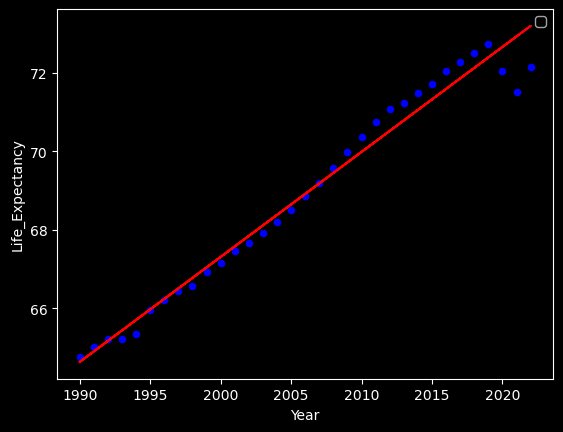

In [34]:
means_per_year.plot(kind = 'scatter', x= 'Year', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le['Year'], lm.fittedvalues, color = 'red');

####    e. Inspect the R-squared value for the model. does it make sense, given the plot?  

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        11:11:40   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- an R-squared value of 0.072 does not make sense to me when looking at the plot. The model appears to very closely predict the data, so I would expect it to be closer to 1. 

### 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [40]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
lm_2021=smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=gdp_le_2021).fit()

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

    a. What coefficients do you get? Interpret the meaning of those coefficients.  

In [41]:
lm_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

- For every increase in GDP per capita by an increase in GDP per capita of 1 correspondes to an increase in Life Expectancy of 0.000257 years or ~ 2.25 hours. 

    b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  

In [48]:
lm_2021_adjusted = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data=gdp_le_2021).fit()
lm_2021_adjusted.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

- The predictor coefficient changes by an order of magnitude of 100, but otherwise the coefficients do not change. 

    c. Are the coefficients statistically significant?  

In [51]:
lm_2021_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        11:39:45   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The p-values near zero indicate that these coefficients are statistically significant.

    d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?

In [67]:
coefficients = pd.DataFrame(lm_2021_adjusted.params)
coefficients.columns = ['Value']
coefficients.index = ['intercept', 'predictor']
predictor = coefficients['Value']['predictor']
intercept = coefficients['Value']['intercept']
mean_le_50k = predictor * 50 + intercept
mean_le_100k = predictor * 100 + intercept
[mean_le_50k, mean_le_100k, (mean_le_100k/mean_le_50k)]

[78.7944572464132, 91.63904465544813, 1.163013844601609]

- The country with GDP per capita of $100000 has more than 10 years life expectancy of a country with GDP per Capita of $50000

    e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit

### 3. Now, fit a model for life expectancy based on the log of gdp per capita.  

    a. Inspect the coefficients for this model. Are they statistically significant?

    b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?

    c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

### 4. Finally, return to the full dataset. 

    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.

    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?